# Autoencoders

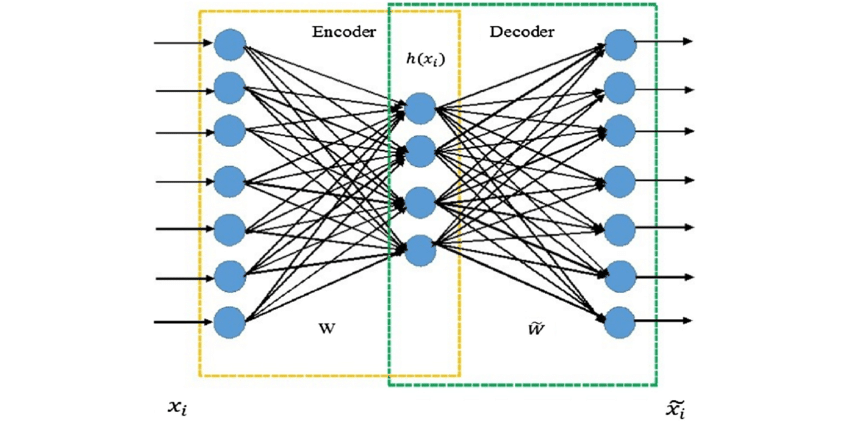

In [91]:
from IPython.display import Image
PATH = "./temp_data/autoencoder1.png"
Image(filename = PATH, width=700, height=150)

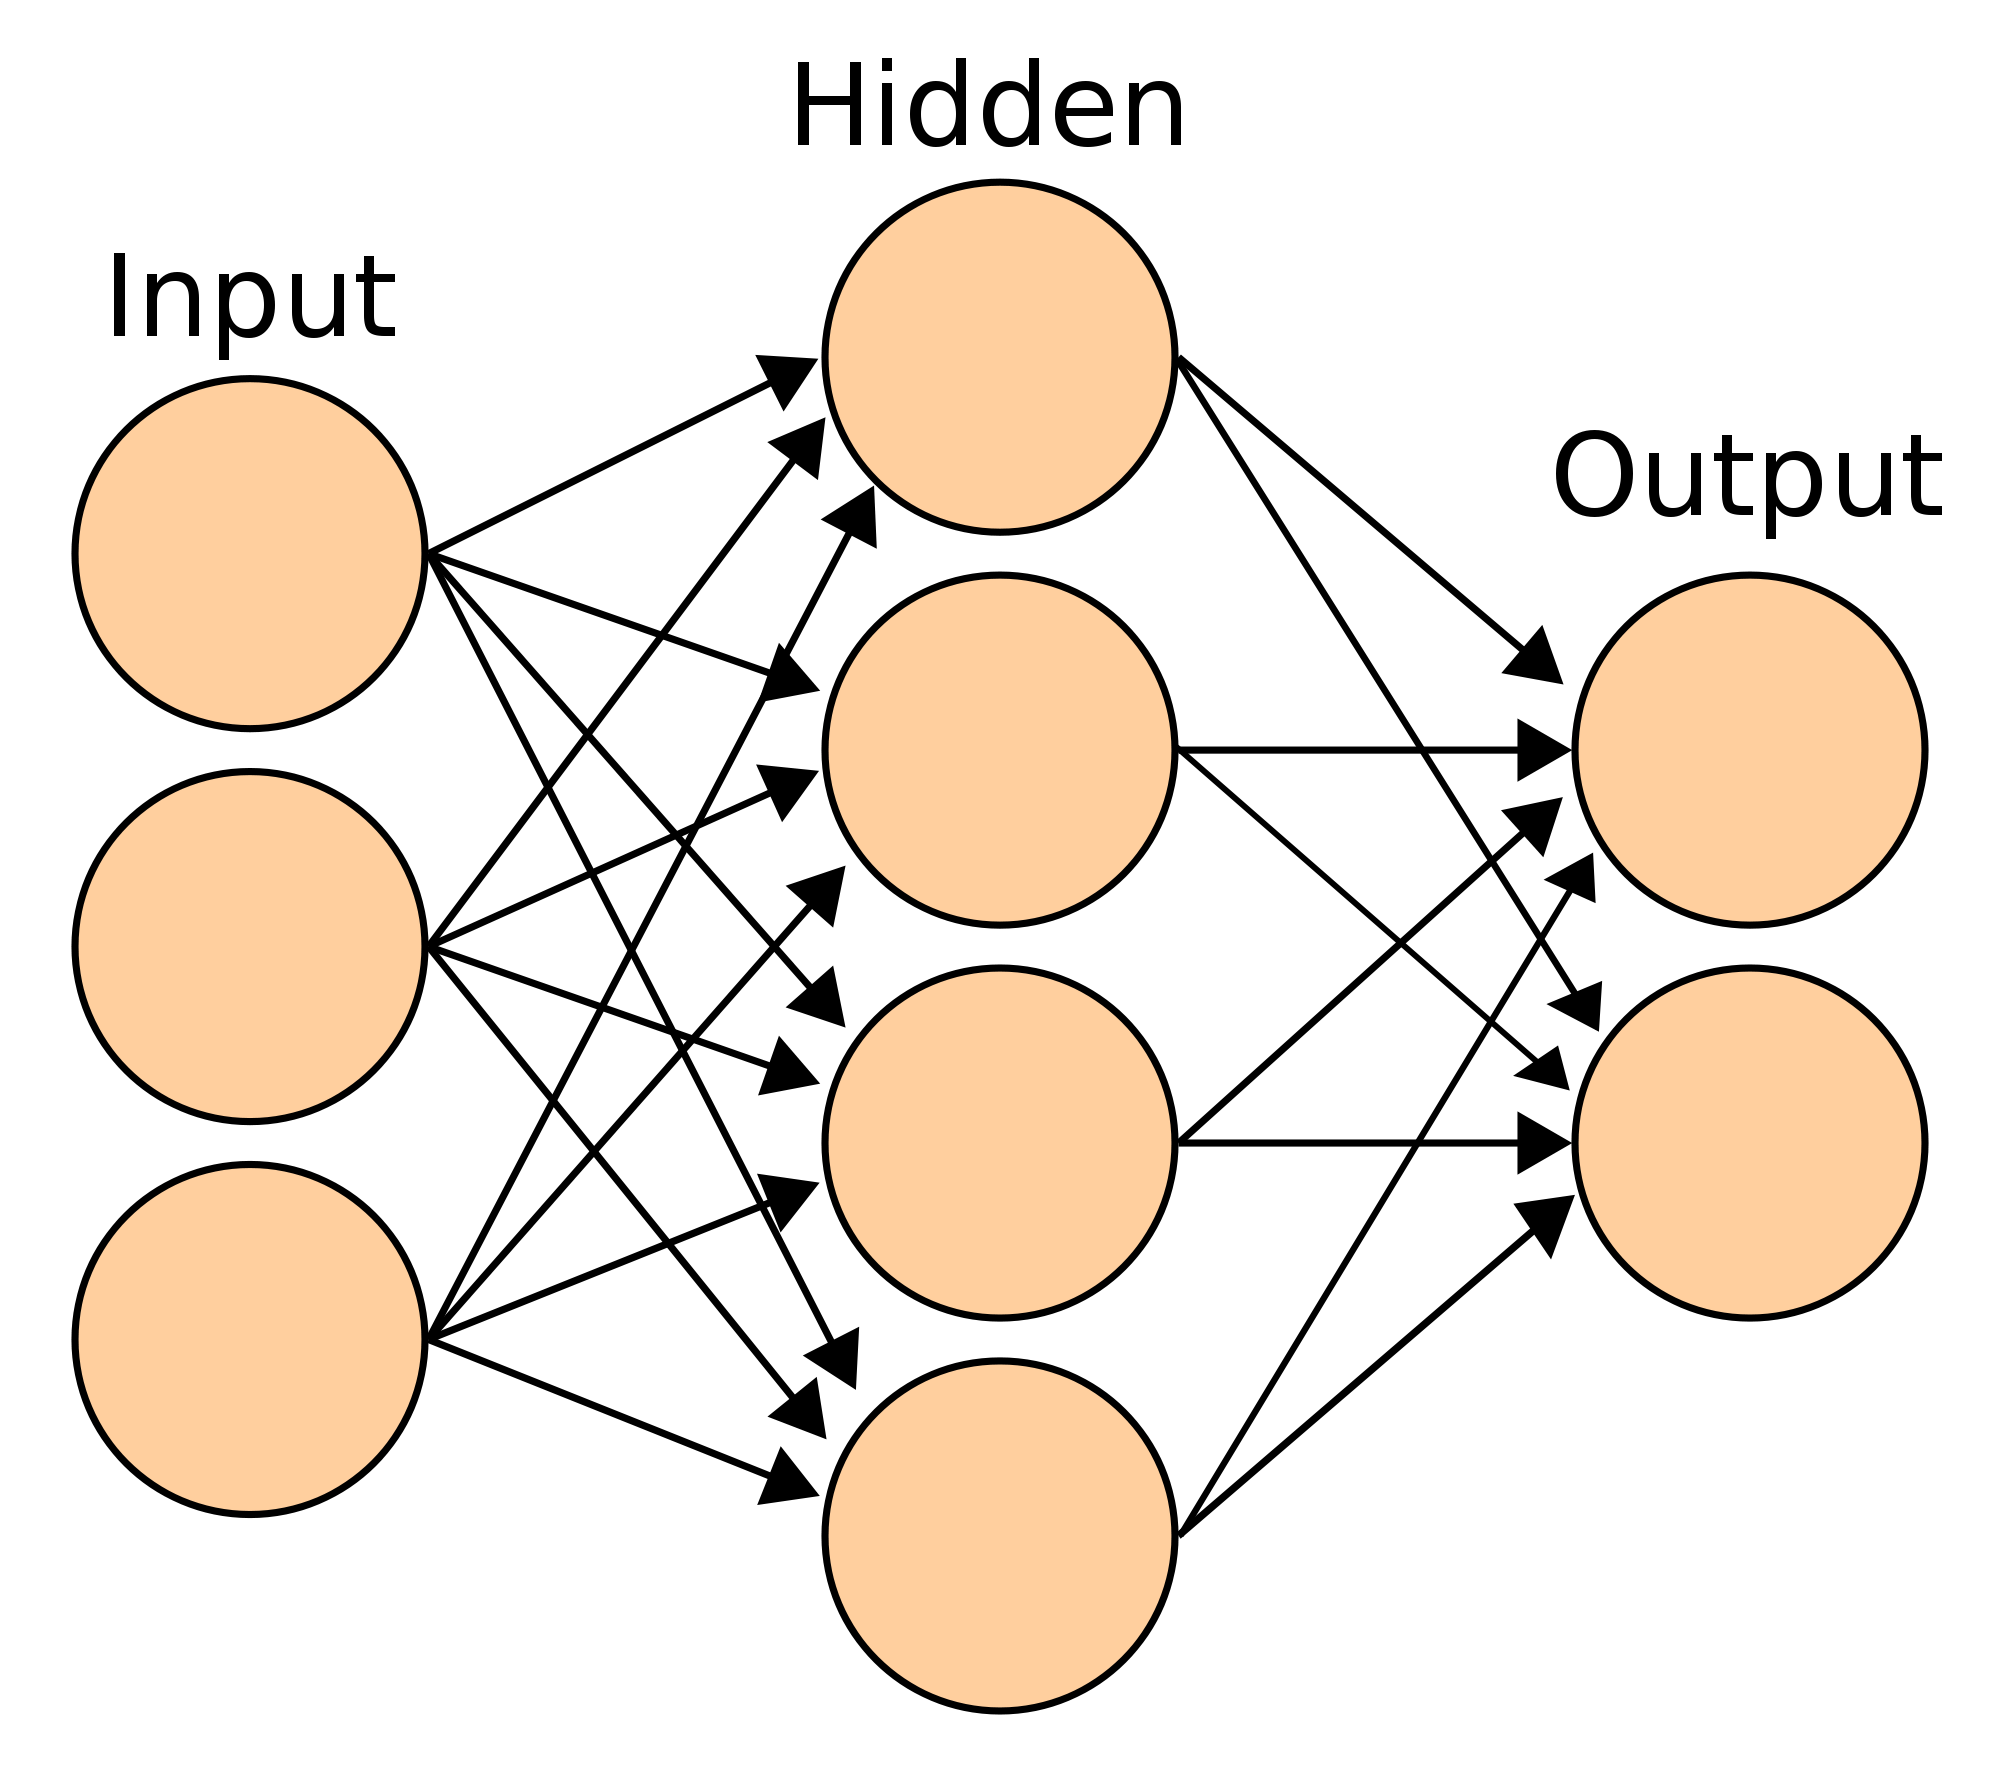

In [93]:
from IPython.display import Image
PATH = "./temp_data/ANN.png"
Image(filename = PATH, width=300, height=150)

In [2]:
%reset -f
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from wavhandler import *
from utils import *
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import logging
logger = logging.getLogger()
logger.propagate = False
logger.setLevel(logging.ERROR)
np.random.seed(0)
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Reshape, BatchNormalization
from keras.models import Model
from keras import backend as K

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


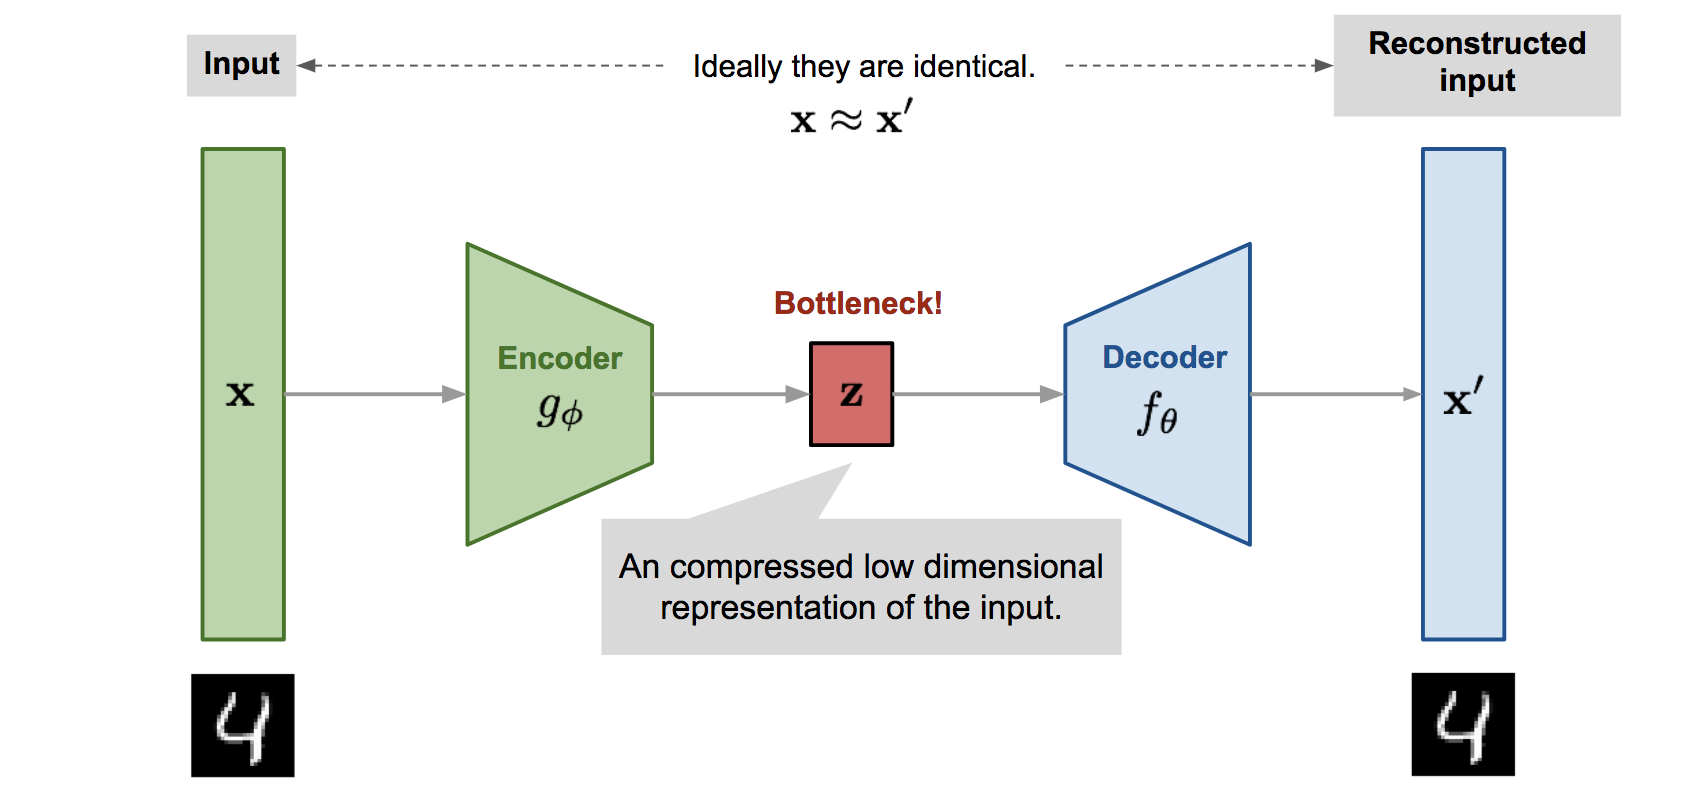

In [78]:
from IPython.display import Image
PATH = "./temp_data/autoencoder.png"
Image(filename = PATH, width=800, height=150)

In [13]:
dataset = Dataset('LG')
dataset.read(setting='psd_dB')
target_names = dataset.target_classes
X_names = dataset.filenames
y = dataset.y
X = dataset.X
print("X_shape:", X.shape)
print("y_shape:", y.shape)

Read filenames in 0.07 seconds.
Loaded data into matrix in 3.01 seconds.
X_shape: (12746, 129)
y_shape: (12746,)


In [14]:
from sklearn.preprocessing import MinMaxScaler

X_std = X
# X_std = StandardScaler(with_std=False).fit_transform(X);  # standardization of data
X_std = MinMaxScaler(feature_range=(0,1)).fit_transform(X)

X, y = shuffle(X_std, y, random_state=3)
#del df

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=2018)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print(x_train.shape, x_test.shape)

(12108, 129, 1) (638, 129, 1)


In [15]:
# input_dim = x_train.shape[1]
# encoding_dim = 2
# input_img = Input(batch_shape=(None,5000,1))
# # encoder = Conv1D(256,3, activation='relu', padding='same')(input_img)
# # encoder = Conv1D(256,3, activation='relu', padding='same')(encoder)
# # encoder = MaxPooling1D(2)(encoder)
# # encoder = Conv1D(128,3, activation='relu', padding='same')(input_img)
# # encoder = Conv1D(128,3, activation='relu', padding='same')(encoder)
# # encoder = MaxPooling1D(2)(encoder)
# encoder = Conv1D(64,3, activation='relu', padding='same')(input_img)
# encoder = Conv1D(64,3, activation='relu', padding='same')(encoder)
# encoder = MaxPooling1D(2)(encoder)
# encoder = Conv1D(32,3, activation='relu', padding='same')(encoder)
# encoder = Conv1D(32,3, activation='relu', padding='same')(encoder)
# # encoder = BatchNormalization()(encoder)
# encoder = MaxPooling1D(2)(encoder)
# encoder = Conv1D(16,3, activation='relu', padding='same')(encoder)
# encoder = Conv1D(16,3, activation='relu', padding='same')(encoder)
# encoder = MaxPooling1D(2)(encoder)

# encoder = Dense(encoding_dim, activation='relu')(encoder)

# decoder = Conv1D(16, 3, activation='relu', padding='same')(encoder)
# decoder = Conv1D(16, 3, activation='relu', padding='same')(decoder)
# decoder =  UpSampling1D(2)(decoder)
# decoder = Conv1D(32, 3, activation='relu', padding='same')(decoder)
# decoder = Conv1D(32, 3, activation='relu', padding='same')(decoder)
# decoder =  UpSampling1D(2)(decoder)
# # decoder = BatchNormalization()(decoder)
# decoder = Conv1D(64, 3, activation='relu', padding='same')(decoder)
# decoder = Conv1D(64, 3, activation='relu', padding='same')(decoder)
# decoder =  UpSampling1D(2)(decoder)
# # decoder = Conv1D(128, 3, activation='relu', padding='same')(decoder)
# # decoder = Conv1D(128, 3, activation='relu', padding='same')(decoder)
# # decoder =  UpSampling1D(2)(decoder)
# # decoder = Conv1D(256, 3, activation='relu', padding='same')(decoder)
# # decoder = Conv1D(256, 3, activation='relu', padding='same')(decoder)
# # decoder =  UpSampling1D(2)(decoder)
# decoder = Conv1D(1, 3, activation='sigmoid', padding='same')(decoder)
# autoencoder = Model(input_img, decoder)
# autoencoder.compile(optimizer='adam', loss='mse')
# print(autoencoder.summary())

In [16]:
# x_train = np.expand_dims(x_train, axis=-1)
# y_train = np.expand_dims(y_train, axis=-1)
# # print(x_train.shape, y_train.shape)

In [17]:
# # ENCODER

input_sig = Input(batch_shape=(None,129,1))
x = Conv1D(64,3, activation='relu', padding='valid')(input_sig)
x1 = MaxPooling1D(2)(x)
x2 = Conv1D(32,3, activation='relu', padding='valid')(x1)
x3 = MaxPooling1D(2)(x2)
flat = Flatten()(x3)
encoded = Dense(32,activation = 'relu')(flat)
 
print("shape of encoded {}".format(K.int_shape(encoded)))
 
# DECODER 
x2_ = Conv1D(32, 3, activation='relu', padding='valid')(x3)
x1_ = UpSampling1D(2)(x2_)
x_ = Conv1D(64, 3, activation='relu', padding='valid')(x1_)
upsamp = UpSampling1D(2)(x_)
flat = Flatten()(upsamp)
decoded = Dense(129,activation = 'relu')(flat)
decoded = Reshape((129,1))(decoded)
 
print("shape of decoded {}".format(K.int_shape(decoded)))
 
autoencoder = Model(input_sig, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

shape of encoded (None, 32)
shape of decoded (None, 129, 1)


In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
callbacks_list = [EarlyStopping(monitor = 'loss', patience = 3, verbose = 1), 
                  ReduceLROnPlateau(monitor = 'loss', factor = 0.1, patience = 3, verbose = 1)]

history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=32,
#                 shuffle=True,
                verbose = 1,
                callbacks=callbacks_list)

Epoch 1/100
12108/12108 [==============================] - 17s 1ms/step - loss: 0.7490 - acc: 1.4469e-04
Epoch 2/100
12108/12108 [==============================] - 4s 339us/step - loss: 0.5505 - acc: 1.4981e-04
Epoch 3/100
12108/12108 [==============================] - 4s 343us/step - loss: 0.5270 - acc: 1.5238e-04
Epoch 4/100
12108/12108 [==============================] - 4s 338us/step - loss: 0.5272 - acc: 1.5302e-04
Epoch 5/100
12108/12108 [==============================] - 4s 341us/step - loss: 0.5255 - acc: 1.5302e-04
Epoch 6/100
12108/12108 [==============================] - 4s 337us/step - loss: 0.5253 - acc: 1.5302e-04
Epoch 7/100
12108/12108 [==============================] - 4s 341us/step - loss: 0.5263 - acc: 1.5302e-04
Epoch 8/100
12108/12108 [==============================] - 4s 334us/step - loss: 0.5250 - acc: 1.5302e-04
Epoch 9/100
12108/12108 [==============================] - 4s 338us/step - loss: 0.5248 - acc: 1.5302e-04
Epoch 10/100
12108/12108 [=====================

### Reconstructing test data

 FIRST ROW : ORIGINAL DATA (test set) 
 SECOND ROW : RECONSTRUCTED DATA 


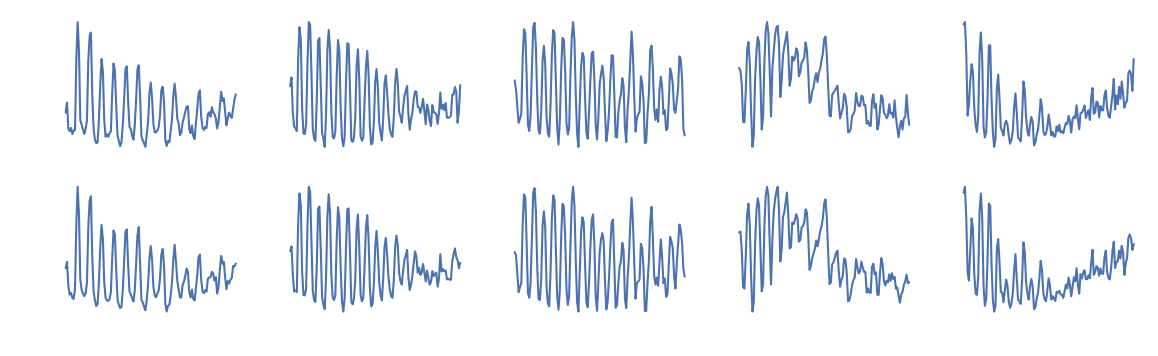

In [82]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 5
print(' FIRST ROW : ORIGINAL DATA (test set) ')
print(' SECOND ROW : RECONSTRUCTED DATA ')
plt.figure(figsize=(14, 4), dpi=100)
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.plot(x_test[i])
    plt.gray()
    ax.set_axis_off()

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.plot(decoded_imgs[i])
    plt.gray()
    ax.set_axis_off()

plt.show()


### Do they have similar frequency peaks?
#### Plotting histogram of all frequency peaks for decoded signals

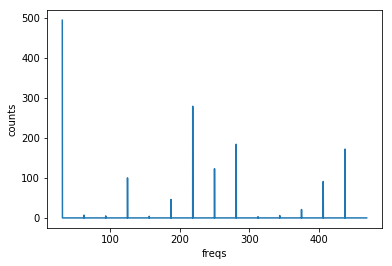

In [51]:
Z = decoded_imgs.squeeze()

from scipy.signal import find_peaks
freq_range = np.linspace(0, F_S/2, 129)
freqs = []
for i in range(Z.shape[0]):
    sig = Z[i,:]

    peaks, _ = find_peaks(sig)
    freqs = freqs + freq_range[peaks].tolist()
df_tmp = pd.DataFrame(pd.to_numeric(pd.Series(freqs)), columns=['freqs'])
df_tmp = df_tmp[df_tmp['freqs'] < 500]

np_hist(df,'freqs')
# df_tmp.freqs.value_counts()

In [85]:
tmp = x_test.squeeze()
from scipy.signal import find_peaks
freq_range = np.linspace(0, F_S/2, 129)
freqs = []
for i in range(tmp.shape[0]):
    sig = tmp[i,:]
    peaks, _ = find_peaks(sig)
    freqs = freqs + freq_range[peaks].tolist()
df_tmp = pd.DataFrame(pd.to_numeric(pd.Series(freqs)), columns=['freqs'])
df_tmp = df_tmp[df_tmp['freqs'] < 500]

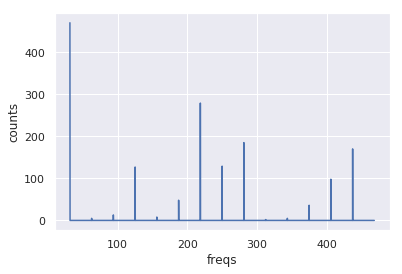

In [86]:
np_hist(df_tmp, 'freqs')

#### Are there decoded data that are duplicated?

In [65]:
pd.DataFrame(np.vstack((Z,X))).duplicated().sum()

0

## TODO:

1. Use raw signal
  - Tricky to train (try to crop it to contain only flight data, same length for all)
2. Try variational autoencoders
  - Generate new data for insects that we don't have enough

**Variational autoencoder (VAE)**  

Variational autoencoders are a slightly more modern and interesting take on autoencoding.

 -  added constraints on the encoded representations being learned. 
     - More precisely, it is an autoencoder that learns a latent variable model for its input data. So instead of letting your neural network learn an arbitrary function, you are learning the parameters of a probability distribution modeling your data. If you sample points from this distribution, you can generate new input data samples: a VAE is a "generative model".

